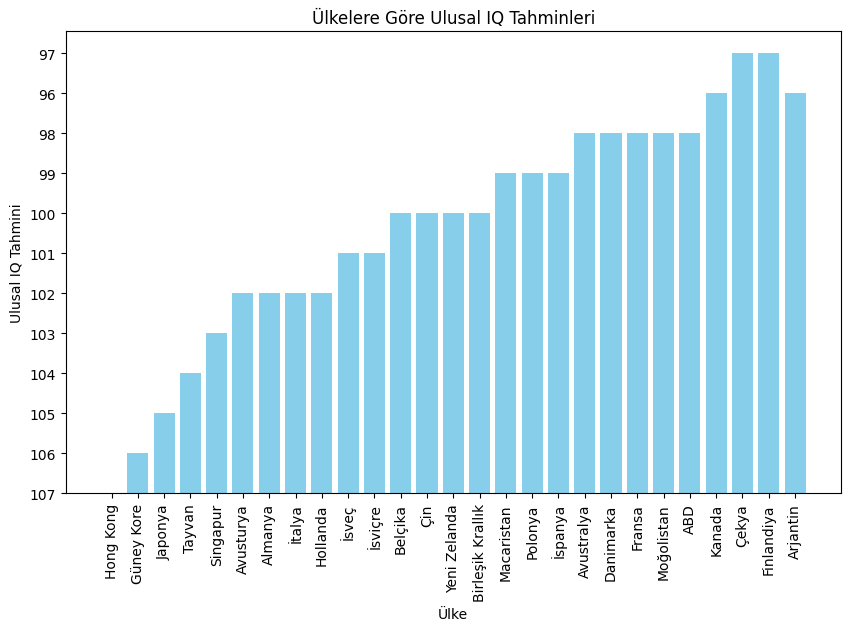

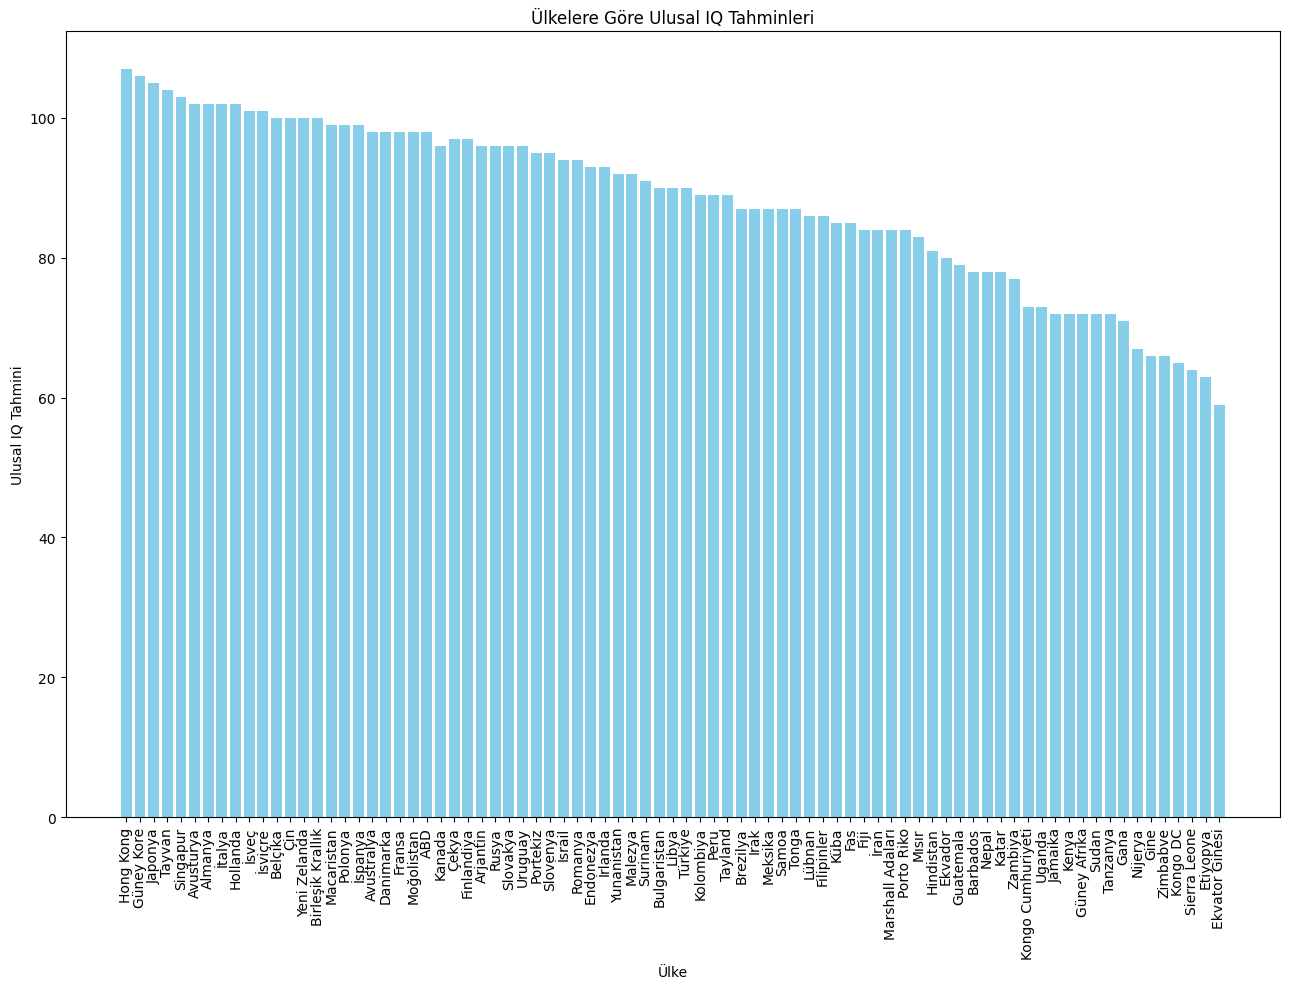

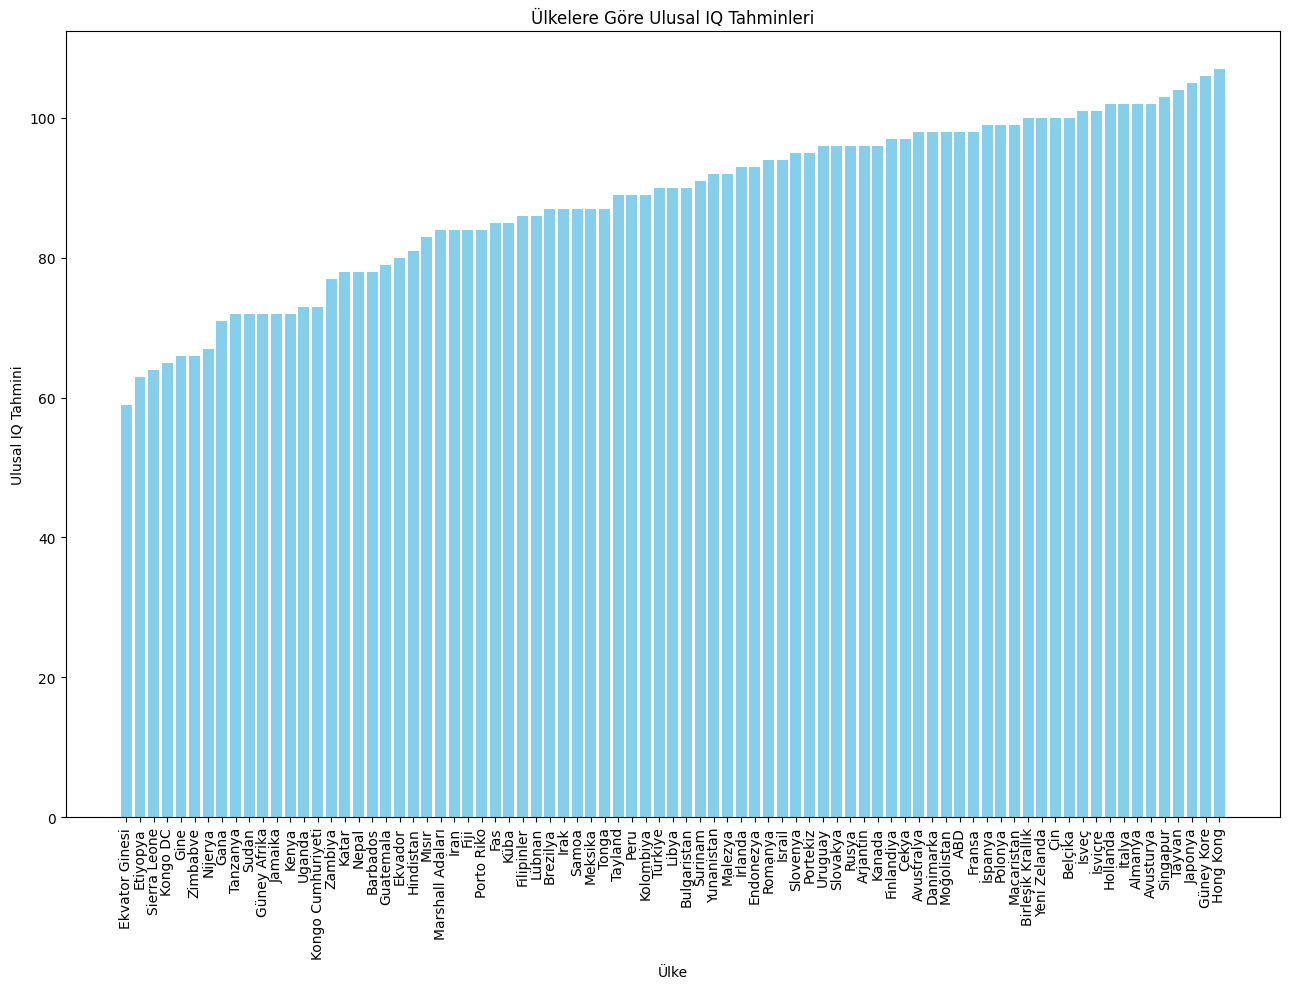

In [462]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from time import sleep
import requests
from bs4 import BeautifulSoup

# Web sitelerinden HTML içeriğini aldım I scraped

url = "https://tr.wikipedia.org/wiki/Ülkelere_göre_IQ"
r = requests.get(url)

# HTML içeriğini ayrıştırdım

data = BeautifulSoup(r.content, "html.parser")

# Tüm tabloları çektim

tables = data.find_all("table")

# İkinci tabloyu aldım

table = tables[1]

# Tablolardaki tüm yapı elemanları olan tr'leri aldım.

rows = table.find_all("tr")

# Depolama yapabilmek için bir store açtım

store = []

# For döngüleri kullanarak bulduğum her elemanı teker teker
# Tablodaki yerlerine yerleştirdim

for row in rows:
    cells = row.find_all(["td"]) # Başlıkları almadım
    row_data = []
    for cell in cells:
        row_data.append(cell.get_text(strip=True)) 
    store.append(row_data)  # Hepsini store'a ekledim

# Pandas kullanarak store'u dataframe yaptım.

df = pd.DataFrame(store)

# İstediğim lokasyondaki ögeyi alabilmek için iloc kullandım.(deneme)

no_output = df.iloc[1:2,4:6]

# Plot example for first 25 country

plt.figure(figsize=(10, 6))
plt.bar(df.iloc[1:][1], df.iloc[1:][2], color='skyblue')
plt.xticks(rotation=90)  # Ülke isimlerini dikey olarak yerleştirme
plt.title('Ülkelere Göre Ulusal IQ Tahminleri')
plt.xlabel('Ülke')
plt.ylabel('Ulusal IQ Tahmini')
plt.show()

# Now, We can see that our heads are same. Hence, there are some problems

# Let's make unique heads.

df = df[1:]

# I called them with different names

df.columns = ["Sıra_1","Ülke_1","IQ_1","Sıra_2","Ülke_2","IQ_2","Sıra_3","Ülke_3","IQ_3"]

# I merged whole same columns

Sıra = pd.concat([df['Sıra_1'], df['Sıra_2'], df['Sıra_3']], ignore_index=True)
Ülke = pd.concat([df['Ülke_1'], df['Ülke_2'], df['Ülke_3']], ignore_index=True)
IQ = pd.concat([df['IQ_1'], df['IQ_2'], df['IQ_3']], ignore_index=True)

# I created an empty dataframe for filling

df = []
df = pd.DataFrame(df)

# and I filled it with new unique columns

df["Sıra"] = Sıra
df["Ülke"] = Ülke
df["IQ"] = IQ

# in the df , there is no numeric IQ; we have to convert syntax to number

df['IQ'] = pd.to_numeric(df['IQ'])

# Then i created a basic graph

plt.figure(figsize=(13, 10))
plt.bar(df['Ülke'], df["IQ"], color='skyblue')
plt.xticks(rotation=90)  # Ülke isimlerini dikey olarak yerleştirme
plt.title('Ülkelere Göre Ulusal IQ Tahminleri')
plt.xlabel('Ülke')
plt.ylabel('Ulusal IQ Tahmini')
plt.tight_layout()
plt.show()

# Now, the graph should be sorted. Let's try.

df_sorted = df.sort_values(by = "IQ", ascending= True)

# I created a better graph

plt.figure(figsize=(13, 10))
plt.bar(df_sorted['Ülke'], df_sorted["IQ"], color='skyblue')
plt.xticks(rotation=90)  # Ülke isimlerini dikey olarak yerleştirme
plt.title('Ülkelere Göre Ulusal IQ Tahminleri')
plt.xlabel('Ülke')
plt.ylabel('Ulusal IQ Tahmini')
plt.tight_layout()
plt.show()


In [463]:
# Web sitelerinden HTML içeriğini aldım

url_2 = "https://tr.wikipedia.org/wiki/Ülkelere_göre_dinler"
r_2 = requests.get(url_2)

# HTML içeriğini ayrıştırdım

data_2 = BeautifulSoup(r_2.content, "html.parser")

# Tüm tabloları çektim

tables_2 = data_2.find_all("table")

# İkinci tabloyu aldım

table_2 = tables_2[0]

# Tablolardaki tüm yapı elemanları olan tr'leri aldım.

rows_2 = table_2.find_all("tr")

# Depolama yapabilmek için bir store açtım

store_2 = []

# For döngüleri kullanarak bulduğum her elemanı teker teker
# Tablodaki yerlerine yerleştirdim

for row_2 in rows_2:
    cells_2 = row_2.find_all(["td"]) # Başlıkları almadım
    row_data_2 = []
    for cell_2 in cells_2:
        row_data_2.append(cell_2.get_text(strip=True)) 
    store_2.append(row_data_2)  # Hepsini store'a ekledim

# Pandas kullanarak store'u dataframe yaptım.

df_2 = pd.DataFrame(store_2)

# Let's make unique heads.

df_2 = df_2[1:]

# I called them with different names

df_2.columns = ["Ülke","Nüfus","Hristiyan","Yüz_Hri","Müslüman","Yüz_Müs","Dinsiz","Yüz_Dinsiz","Hindu","Yüz_Hin","Budist","Yüz_Bud","Geleneksel","Yüz_Gel","Diğer","Yüz_Diğer","Yahudi","Yüz_Yahudi"]

df_2

,Ülke,Nüfus,Hristiyan,Yüz_Hri,Müslüman,Yüz_Müs,Dinsiz,Yüz_Dinsiz,Hindu,Yüz_Hin,Budist,Yüz_Bud,Geleneksel,Yüz_Gel,Diğer,Yüz_Diğer,Yahudi,Yüz_Yahudi
1,Burundi,8.380.000,7.667.700,"91,5",234.640,"2,8",0,0,0,0,0,0,477.660,"5,7",0,0,0,0
2,Komorlar,730.000,3.650,"0,5",717.590,"98,3",730,"0,1",0,0,0,0,7.300,1,0,0,0,0
3,Cibuti,890.000,20.470,"2,3",862.410,"96,9",1.780,"0,2",0,0,0,0,2.670,"0,3",0,0,1.780,"0,2"
4,Eritre,5.250.000,3.302.250,"62,9",1.921.500,"36,6",5.250,"0,1",0,0,0,0,21.000,"0,4",0,0,0,0
5,Etiyopya,82.950.000,52.092.600,"62,8",28.700.700,"34,6",50.000,"0,06",0,0,0,0,2.156.700,"2,6",0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,Sudan,33.600.000,1.814.400,"5,4",30.475.200,"90,7",336.000,1,0,0,0,0,940.800,"2,8",0,0,0,0
284,Tunus,10.480.000,20.960,"0,2",10.427.600,"99,5",20.960,"0,2",0,0,0,0,0,0,0,0,0,0
285,Kuzey Afrika,199.510.000,6.236.200,"3,13",191.199.440,"95,83",1.010.260,"0,51",0,0,19.080,"0,01",950.800,"0,48",0,0,0,0
286,Orta DoğuveKuzey Afrika,341.020.000,12.752.770,"3,74",317.058.950,"92,97",2.036.990,"0,6",1.700.260,"0,5",492.130,"0,14",1.047.990,"0,31",220.710,"0,06",5.617.080,"1,65"


In [464]:
# Now i need to merge my data sets. by using same columns and same countries.
# I need to use pandas merge (inner) function

combined_df = pd.merge(df,df_2,how="inner")

# I have to check for any error

combined_df[combined_df["Nüfus"]==None]==True 

# I checked it and there is no error

# Let's look at combined_df

combined_df

# Well done, good job for me :D

,Sıra,Ülke,IQ,Nüfus,Hristiyan,Yüz_Hri,Müslüman,Yüz_Müs,Dinsiz,Yüz_Dinsiz,Hindu,Yüz_Hin,Budist,Yüz_Bud,Geleneksel,Yüz_Gel,Diğer,Yüz_Diğer,Yahudi,Yüz_Yahudi
0,1,Hong Kong,107,7.050.000,1.008.150,"14,3",126.900,"1,8",3.955.050,"56,1",28.200,"0,4",930.600,"13,2",902.400,"12,8",105.750,"1,5",0,0
1,1,Güney Kore,106,48.180.000,14.164.920,"29,4",96.360,"0,2",22.355.520,"46,4",0,0,11.033.220,"22,9",385.440,"0,8",96.360,"0,2",0,0
2,2,Japonya,105,126.540.000,2.024.640,"1,6",253.080,"0,2",72.127.800,57,30.000,"0,02",45.807.480,"36,2",506.160,"0,4",5.947.380,"4,7",0,0
3,2,Tayvan,104,23.220.000,1.277.100,"5,5",10.000,"0,04",2.948.940,"12,7",0,0,4.945.860,"21,3",10.263.240,"44,2",3.761.640,"16,2",0,0
4,4,Singapur,103,5.090.000,926.380,"18,2",727.870,"14,3",834.760,"16,4",264.680,"5,2",1.725.510,"33,9",117.070,"2,3",493.730,"9,7",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,75,Gine,66,9.980.000,1.087.820,"10,9",8.423.120,"84,4",179.640,"1,8",0,0,0,0,269.460,"2,7",0,0,0,0
76,75,Zimbabve,66,12.570.000,10.935.900,87,113.130,"0,9",993.030,"7,9",0,0,0,0,477.660,"3,8",37.710,"0,3",10.000,"0,08"
77,78,Sierra Leone,64,5.870.000,1.226.830,"20,9",4.578.600,78,5.870,"0,1",0,0,0,0,46.960,"0,8",0,0,0,0
78,79,Etiyopya,63,82.950.000,52.092.600,"62,8",28.700.700,"34,6",50.000,"0,06",0,0,0,0,2.156.700,"2,6",0,0,0,0


In [465]:
# Let's check again

combined_df.isna().sum()

Sıra          0
Ülke          0
IQ            0
Nüfus         0
Hristiyan     0
Yüz_Hri       0
Müslüman      0
Yüz_Müs       0
Dinsiz        0
Yüz_Dinsiz    0
Hindu         0
Yüz_Hin       0
Budist        0
Yüz_Bud       0
Geleneksel    0
Yüz_Gel       0
Diğer         0
Yüz_Diğer     0
Yahudi        0
Yüz_Yahudi    0
dtype: int64

In [466]:
# I fixed data type problem

str_to_int = ["Nüfus","Hristiyan","Yüz_Hri","Müslüman","Yüz_Müs","Dinsiz","Yüz_Dinsiz","Hindu","Yüz_Hin","Budist","Yüz_Bud","Geleneksel","Yüz_Gel","Diğer","Yüz_Diğer","Yahudi","Yüz_Yahudi"]

# Sütunlar içindeki değerlerin tipini stringe dönüştürdüm
combined_df[str_to_int] = combined_df[str_to_int].astype(str)

# Noktaları kaldırdım çünkü hata verdi bol bol ve virgülleri de nokta yaptım
# ingilizceye uyumlu hale getirdim böylece
combined_df[str_to_int] = combined_df[str_to_int].apply(lambda x: x.str.replace('.', '').str.replace(',', '.'))

# son olarak, sayısal formata dönüştürdüm
combined_df[str_to_int] = combined_df[str_to_int].apply(pd.to_numeric, errors='coerce')

combined_df

,Sıra,Ülke,IQ,Nüfus,Hristiyan,Yüz_Hri,Müslüman,Yüz_Müs,Dinsiz,Yüz_Dinsiz,Hindu,Yüz_Hin,Budist,Yüz_Bud,Geleneksel,Yüz_Gel,Diğer,Yüz_Diğer,Yahudi,Yüz_Yahudi
0,1,Hong Kong,107,7050000,1008150,14.3,126900,1.80,3955050,56.10,28200,0.40,930600,13.2,902400,12.8,105750,1.5,0,0.00
1,1,Güney Kore,106,48180000,14164920,29.4,96360,0.20,22355520,46.40,0,0.00,11033220,22.9,385440,0.8,96360,0.2,0,0.00
2,2,Japonya,105,126540000,2024640,1.6,253080,0.20,72127800,57.00,30000,0.02,45807480,36.2,506160,0.4,5947380,4.7,0,0.00
3,2,Tayvan,104,23220000,1277100,5.5,10000,0.04,2948940,12.70,0,0.00,4945860,21.3,10263240,44.2,3761640,16.2,0,0.00
4,4,Singapur,103,5090000,926380,18.2,727870,14.30,834760,16.40,264680,5.20,1725510,33.9,117070,2.3,493730,9.7,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,75,Gine,66,9980000,1087820,10.9,8423120,84.40,179640,1.80,0,0.00,0,0.0,269460,2.7,0,0.0,0,0.00
76,75,Zimbabve,66,12570000,10935900,87.0,113130,0.90,993030,7.90,0,0.00,0,0.0,477660,3.8,37710,0.3,10000,0.08
77,78,Sierra Leone,64,5870000,1226830,20.9,4578600,78.00,5870,0.10,0,0.00,0,0.0,46960,0.8,0,0.0,0,0.00
78,79,Etiyopya,63,82950000,52092600,62.8,28700700,34.60,50000,0.06,0,0.00,0,0.0,2156700,2.6,0,0.0,0,0.00


In [467]:
# Let's look at descriptive statistics

combined_df.describe()

,IQ,Nüfus,Hristiyan,Yüz_Hri,Müslüman,Yüz_Müs,Dinsiz,Yüz_Dinsiz,Hindu,Yüz_Hin,Budist,Yüz_Bud,Geleneksel,Yüz_Gel,Diğer,Yüz_Diğer,Yahudi,Yüz_Yahudi
count,80.00000,8.000000e+01,8.000000e+01,80.000000,8.000000e+01,80.000000,8.000000e+01,80.000000,8.000000e+01,80.000000,8.000000e+01,80.000000,8.000000e+01,80.000000,8.000000e+01,80.00000,8.000000e+01,80.000000
mean,88.18750,6.641912e+07,1.937691e+07,57.805125,1.197317e+07,18.523625,1.260033e+07,12.620875,1.259972e+07,3.086625,4.985541e+06,4.245625,4.203152e+06,2.038363,6.501126e+05,0.68175,1.002408e+05,1.020750
std,11.87071,2.014479e+08,2.998024e+07,35.524985,3.399548e+07,31.579610,7.839994e+07,15.873623,1.088335e+08,13.077542,2.849519e+07,13.626362,3.281592e+07,5.901010,3.372389e+06,2.15045,6.284478e+05,8.445384
min,59.00000,5.000000e+04,2.000000e+04,0.060000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.00000,0.000000e+00,0.000000
25%,79.75000,5.527500e+06,1.192078e+06,17.225000,4.216000e+04,0.275000,1.477950e+05,0.975000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.00000,0.000000e+00,0.000000
50%,90.00000,1.553500e+07,6.265470e+06,70.050000,4.937700e+05,3.850000,8.150300e+05,6.150000,0.000000e+00,0.000000,9.470000e+03,0.060000,5.018000e+04,0.300000,1.121500e+04,0.10000,0.000000e+00,0.000000
75%,98.00000,4.866750e+07,2.789260e+07,86.100000,4.091752e+06,14.325000,3.318188e+06,17.700000,4.159250e+04,0.225000,1.265650e+05,0.425000,3.741000e+05,1.550000,9.403500e+04,0.50000,1.177750e+04,0.082500
max,107.00000,1.341340e+09,1.733106e+08,99.500000,2.091666e+08,99.900000,7.001795e+08,76.400000,9.735650e+08,80.700000,2.441239e+08,93.200000,2.937535e+08,44.200000,2.816603e+07,16.20000,5.609520e+06,75.600000


In [616]:
from tabulate import tabulate

# I found the correlations between religions and IQ level

corr_IQ_Dinsiz = combined_df["IQ"].corr(combined_df["Yüz_Dinsiz"])
corr_IQ_Müs = combined_df["IQ"].corr(combined_df["Yüz_Müs"])
corr_IQ_Hri = combined_df["IQ"].corr(combined_df["Yüz_Hri"])
corr_IQ_Gel = combined_df["IQ"].corr(combined_df["Yüz_Gel"])
corr_IQ_Yahudi = combined_df["IQ"].corr(combined_df["Yüz_Yahudi"])

# I put them into list

correlation = [
    [corr_IQ_Dinsiz,"Dinsiz ve IQ"],
    [corr_IQ_Müs,"Müslüman ve IQ"],
    [corr_IQ_Yahudi, "Yahudi ve IQ"],
    [corr_IQ_Hri, "Hristiyan ve IQ"],
    [corr_IQ_Gel, "Geleneksel Dinler ve IQ"]]

# I printed them as a table

print(tabulate(correlation, headers=["Korelasyon", "Tema"]))

# I created another basic table

correlation = pd.DataFrame(correlation)

correlation


  Korelasyon  Tema
------------  -----------------------
   0.565634   Dinsiz ve IQ
  -0.287518   Müslüman ve IQ
   0.0619471  Yahudi ve IQ
  -0.0890161  Hristiyan ve IQ
   0.113461   Geleneksel Dinler ve IQ


,0,1
0,0.565634,Dinsiz ve IQ
1,-0.287518,Müslüman ve IQ
2,0.061947,Yahudi ve IQ
3,-0.089016,Hristiyan ve IQ
4,0.113461,Geleneksel Dinler ve IQ


<Axes: xlabel='IQ', ylabel='Yüz_Dinsiz'>

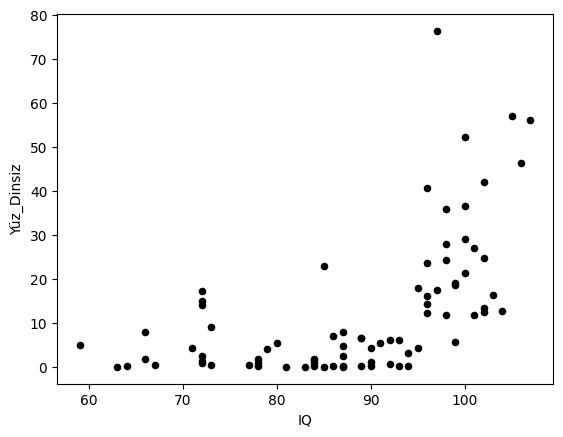

In [468]:
# Example Graphs

combined_df.plot(kind="scatter",
                 x="IQ",
                 y="Yüz_Dinsiz",
                 color = "black")

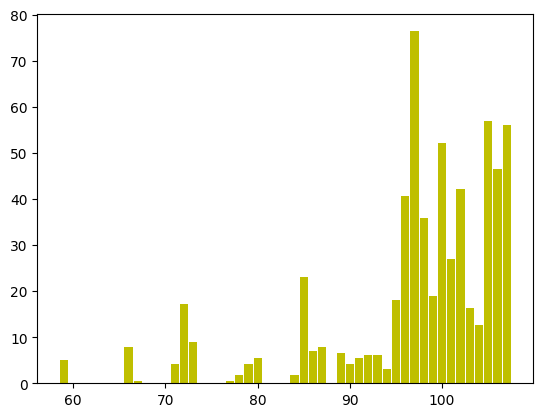

In [469]:
# Created a bar chart for IQ and Ungodly

plt.bar(combined_df["IQ"],combined_df["Yüz_Dinsiz"],width=0.9, color="y")
plt.show()

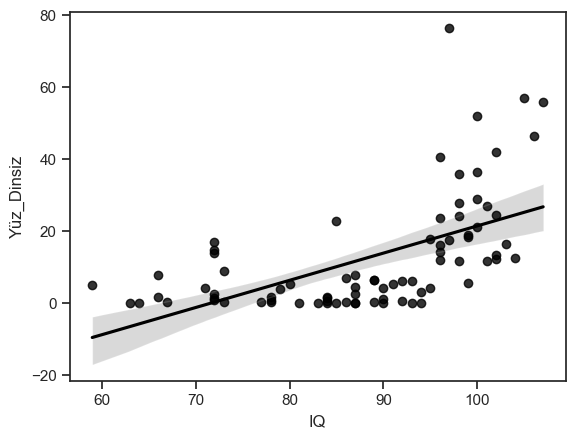

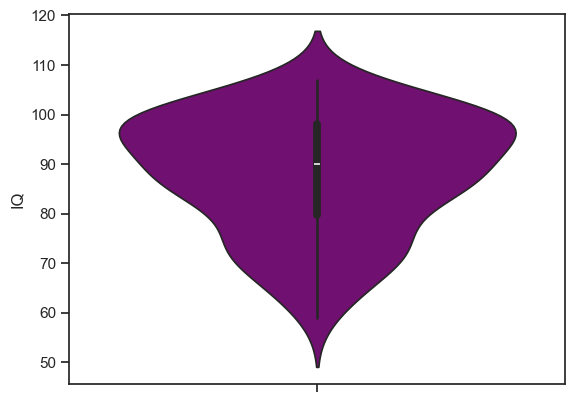

In [515]:
# Created regression plot for IQ and Ungodly data

sns.set_style("ticks")
sns.set_context("notebook")

sns.regplot(x=combined_df["IQ"], y=combined_df["Yüz_Dinsiz"], color="black")
plt.show()

# Created violin plot for IQ data

sns.violinplot(combined_df["IQ"],color="purple")
plt.show()

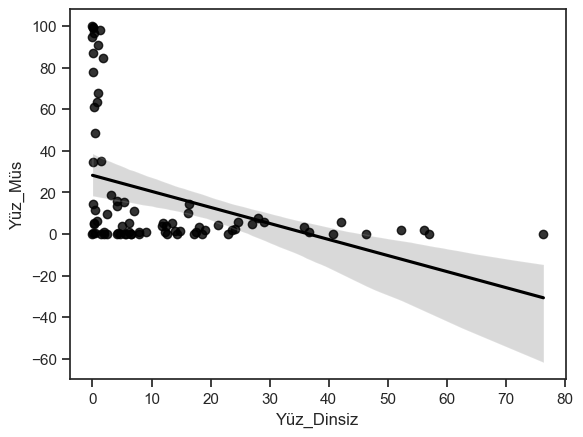

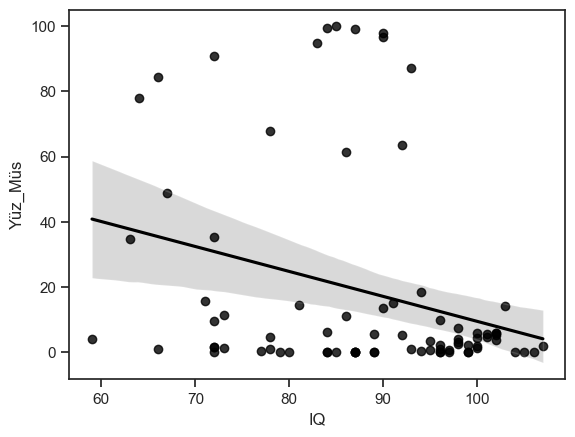

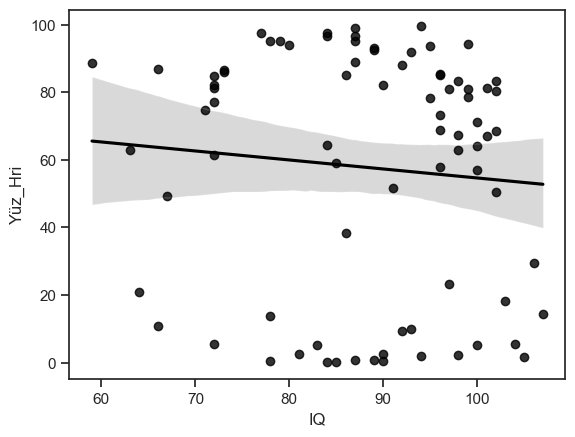

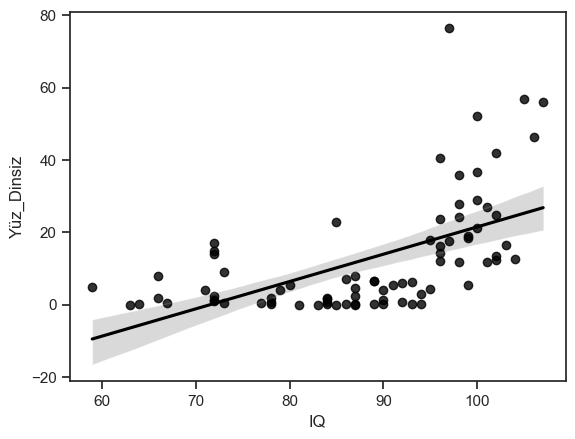

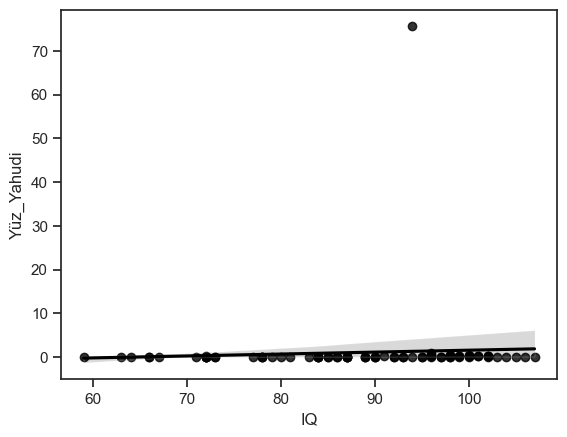

In [621]:
# I created 3 different theme regression plot. For Muslims, Christians and Ungodly people.

sns.regplot(x=combined_df["Yüz_Dinsiz"], y=combined_df["Yüz_Müs"], color="black")
plt.show()

sns.regplot(x=combined_df["IQ"], y=combined_df["Yüz_Müs"], color="black")
plt.show()

sns.regplot(x=combined_df["IQ"], y=combined_df["Yüz_Hri"], color="black")
plt.show()

sns.regplot(x=combined_df["IQ"], y=combined_df["Yüz_Dinsiz"], color="black")
plt.show()

sns.regplot(x=combined_df["IQ"], y=combined_df["Yüz_Yahudi"], color="black")
plt.show()


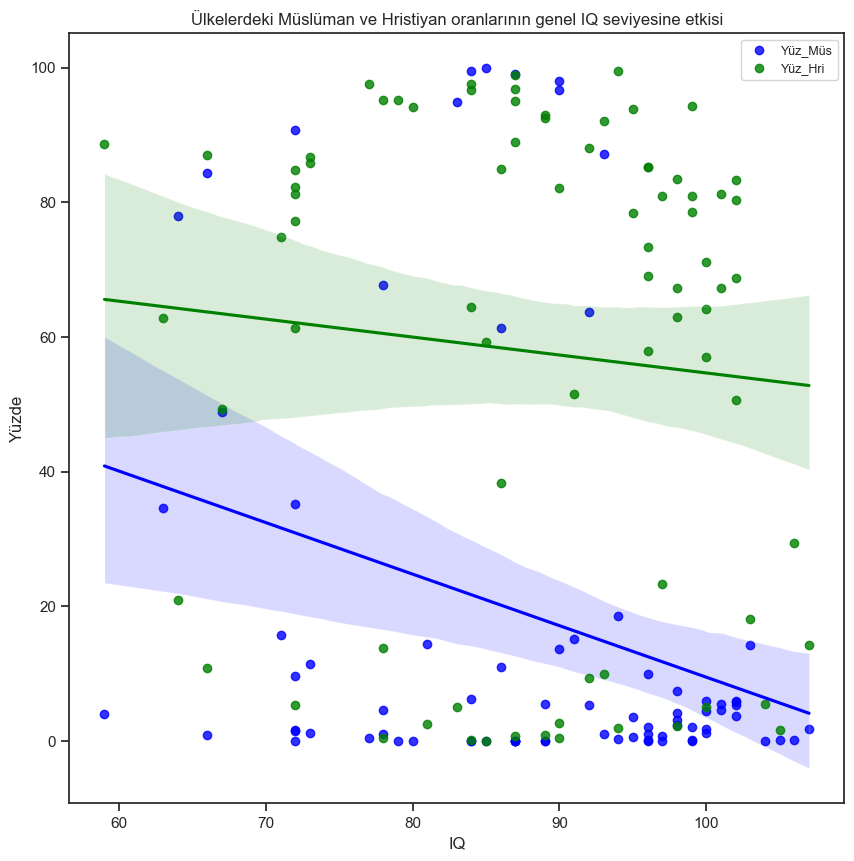

In [559]:
# I merge Muslims and Christians data and IQ level. Now graph is more complex but one picture

fig, ax = plt.subplots(figsize=(10, 10))


sns.regplot(x=combined_df["IQ"], y=combined_df["Yüz_Müs"], color="blue", label="Yüz_Müs")
sns.regplot(x=combined_df["IQ"], y=combined_df["Yüz_Hri"], color="green", label="Yüz_Hri")

plt.title("Ülkelerdeki Müslüman ve Hristiyan oranlarının genel IQ seviyesine etkisi")
plt.xlabel("IQ")
plt.ylabel("Yüzde")
plt.legend(loc="upper right", fontsize = 9)

plt.show()

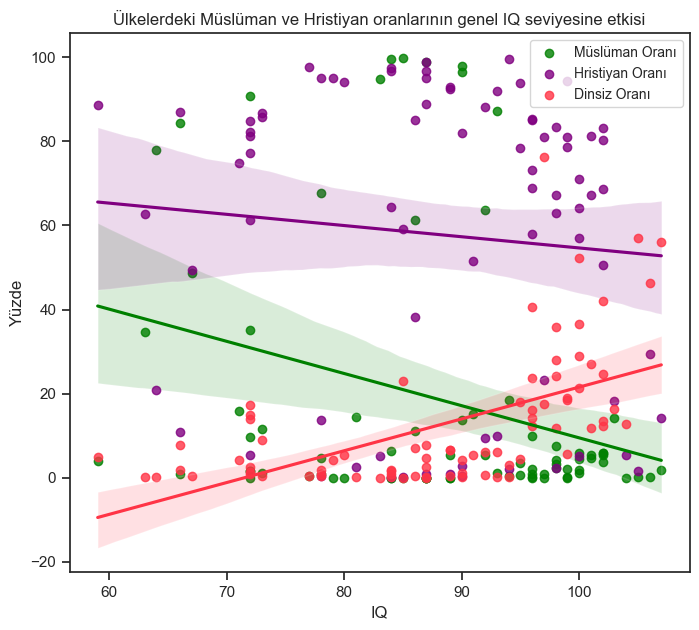

In [622]:
# I merge Muslims, Christians, Ungodly people and IQ level. Now graph is more and more complex but one picture

fig, ax = plt.subplots(figsize=(8, 7))


sns.regplot(x=combined_df["IQ"], y=combined_df["Yüz_Müs"], color="green", label="Müslüman Oranı")
sns.regplot(x=combined_df["IQ"], y=combined_df["Yüz_Hri"], color="#800080", label="Hristiyan Oranı")
sns.regplot(x=combined_df["IQ"], y=combined_df["Yüz_Dinsiz"], color="#FF3446", label="Dinsiz Oranı")


plt.title("Ülkelerdeki Müslüman ve Hristiyan oranlarının genel IQ seviyesine etkisi")
plt.xlabel("IQ")
plt.ylabel("Yüzde")
plt.legend(loc="upper right", fontsize = 10)

plt.show()

# Just looking to karma dini inancı olan bir ülkede bireysel IQ, is better or not?
# Letonya ve Bosna